In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loaded the dataset
df = pd.read_csv('D:/Academics/Degree/Sem 5/FODS/Assigs/Dataset/heart.csv')

## Data Cleaning ##

**Handling Missing Values**

In [5]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
df.info()
print()
# check the percentage
percentage_missing = df.isna().sum() / len(df)*100
print(percentage_missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Old

No missing values in here

<Axes: >

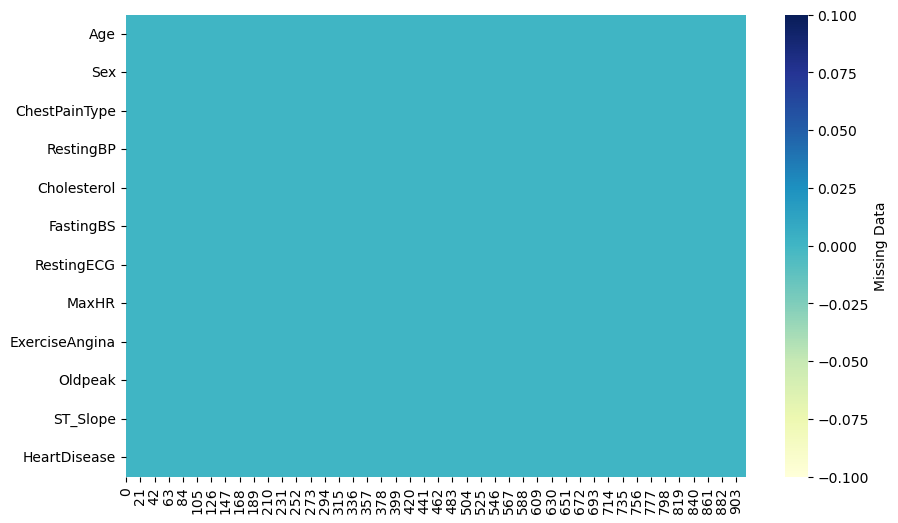

In [8]:
# Visualizing Missing Data using a seaborn heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [9]:
# 1. Handling Missing Values
# Identify Missing Values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# 2. Imputation or Removal
# Check the proportion of missing values
missing_proportion = missing_values / len(df)
print("\nProportion of missing values in each column:")
print(missing_proportion)

# Impute missing values with mean for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    if missing_values[col] > 0:  # Only if there are missing values
        df[col].fillna(df[col].mean(), inplace=True)

# Alternatively, if a column has excessive missing data, consider dropping it
threshold = 0.3  # Example threshold for dropping columns with >30% missing data
columns_to_drop = missing_proportion[missing_proportion > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

Missing values in each column:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Proportion of missing values in each column:
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


**Convert Data Types:** Ensure that each column has the appropriate data type (e.g., Age, RestingBP, and Cholesterol as integers; Sex, ChestPainType, and ExerciseAngina as categorical variables).*

In [11]:
# Convert numerical columns to appropriate types
df['Age'] = df['Age'].astype(int)
df['RestingBP'] = df['RestingBP'].astype(int)
df['Cholesterol'] = df['Cholesterol'].astype(int)

# Convert categorical columns to 'category' type
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Print the first few rows of the original and encoded DataFrames to see the results
print("Original DataFrame (first 5 rows):")
print(df.head())

print("\nEncoded DataFrame (first 5 rows):")
print(df_encoded.head())

# Optionally, print the data types of the columns in both DataFrames
print("\nData types in Original DataFrame:")
print(df.dtypes)

print("\nData types in Encoded DataFrame:")
print(df_encoded.dtypes)

Original DataFrame (first 5 rows):
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Encoded DataFrame (first 5 rows):
   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0     

**Outlier Detection and Treatment
Identify Outliers: Use statistical methods (like Z-scores or IQR) to identify outliers in numerical columns such as RestingBP, Cholesterol, and MaxHR.
Treatment of Outliers: Decide whether to remove, cap, or transform outliers based on their impact on the analysis.**

In [13]:
import numpy as np

# Define a function to identify and treat outliers using IQR
def detect_and_treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # Option to cap the outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    
    return outliers

# Define a function to identify and treat outliers using Z-scores
def detect_and_treat_outliers_zscore(data, column):
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate Z-scores
    z_scores = (data[column] - mean) / std_dev
    
    # Identify outliers (Z-score > 3 or < -3)
    outliers = data[np.abs(z_scores) > 3]
    
    # Option to cap the outliers
    threshold_upper = mean + 3 * std_dev
    threshold_lower = mean - 3 * std_dev
    
    data[column] = np.where(data[column] < threshold_lower, threshold_lower, data[column])
    data[column] = np.where(data[column] > threshold_upper, threshold_upper, data[column])
    
    return outliers

# Apply IQR method for 'RestingBP', 'Cholesterol', and 'MaxHR'
for col in ['RestingBP', 'Cholesterol', 'MaxHR']:
    print(f"\nOutliers detected using IQR for {col}:")
    iqr_outliers = detect_and_treat_outliers_iqr(df, col)
    print(iqr_outliers)

# Apply Z-score method for 'RestingBP', 'Cholesterol', and 'MaxHR'
for col in ['RestingBP', 'Cholesterol', 'MaxHR']:
    print(f"\nOutliers detected using Z-score for {col}:")
    zscore_outliers = detect_and_treat_outliers_zscore(df, col)
    print(zscore_outliers)


Outliers detected using IQR for RestingBP:
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
123   58   F           ATA        180          393          0     Normal   
189   53   M           ASY        180          285          0         ST   
190   46   M           ASY        180          280          0         ST   
241   54   M           ASY        200          198          0     Normal   
274   45   F           ATA        180          295          0     Normal   
275   59   M           NAP        180          213          0     Normal   
278   57   F           ASY        180          347          0         ST   
314   53   M           ASY         80            0          0     Normal   
365   64   F           ASY        200            0          0     Normal   
372   63   M           ASY        185            0          0     Normal   
399   61   M           NAP        200       

**Normalization/Standardization
Scale Numerical Features: Normalize or standardize features like RestingBP, Cholesterol, and MaxHR to bring them onto a similar scale, which is particularly important for algorithms sensitive to feature scaling.**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['RestingBP', 'Cholesterol', 'MaxHR']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the first few rows of the scaled DataFrame to see the results
print("Scaled DataFrame (first 5 rows):")
print(df[numerical_features].head())

# Optionally, print the data types to confirm they remain numeric
print("\nData types after scaling:")
print(df[numerical_features].dtypes)

print("\nNormalization/Standardization completed.")

## Error Cleaning ##

In [ ]:
# 1. Standardize Categorical Variables
# Standardizing 'Sex' column
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

# Standardizing 'ExerciseAngina' column
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'Y': 'Yes', 'N': 'No'})

# Standardizing 'ChestPainType' column (assuming some common types)
chest_pain_mapping = {
    'ATA': 'Typical Angina',
    'NAP': 'Atypical Angina',
    'ASY': 'Asymptomatic',
    'TA': 'Non-Anginal Pain'
}
df['ChestPainType'] = df['ChestPainType'].replace(chest_pain_mapping)

# Convert categorical columns to category type to avoid FutureWarning
df['ChestPainType'] = df['ChestPainType'].astype('category')

# 2. Check for Out-of-Range Values
# Validate numerical columns to ensure they fall within reasonable ranges
# Assuming RestingBP should be in the range of 0-200, Cholesterol in 0-600, and MaxHR in 60-200

# Check RestingBP
out_of_range_RestingBP = df[(df['RestingBP'] < 0) | (df['RestingBP'] > 200)]
if not out_of_range_RestingBP.empty:
    print("Out-of-range values in RestingBP before correction:")
    print(out_of_range_RestingBP)

# Check Cholesterol
out_of_range_Cholesterol = df[(df['Cholesterol'] < 0) | (df['Cholesterol'] > 600)]
if not out_of_range_Cholesterol.empty:
    print("\nOut-of-range values in Cholesterol before correction:")
    print(out_of_range_Cholesterol)

# Check MaxHR
out_of_range_MaxHR = df[(df['MaxHR'] < 60) | (df['MaxHR'] > 200)]
if not out_of_range_MaxHR.empty:
    print("\nOut-of-range values in MaxHR before correction:")
    print(out_of_range_MaxHR)

# Optionally, you can handle out-of-range values by capping them to the maximum/minimum acceptable limits
df['RestingBP'] = df['RestingBP'].clip(lower=0, upper=200)
df['Cholesterol'] = df['Cholesterol'].clip(lower=0, upper=600)
df['MaxHR'] = df['MaxHR'].clip(lower=60, upper=200)

# Display some of the corrected rows for confirmation
print("\nSample of corrected dataset (first 10 rows):")
print(df.head(10))